# Clustering Indian States Based on Socioeconomic Indicators

This notebook clusters 28 Indian states using KMeans based on:
- Literacy Rate (%)
- Per Capita Income (₹)
- Population Density (people/km²)
- Unemployment Rate (per 1000)

We'll explore the data, scale it, apply KMeans, and visualize the results.


In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('indian_states_data.csv')
df.head()

,State,Literacy Rate,Per Capita Income,Population Density,Unemployment Rate
0,Andhra Pradesh,67.02,242479,308,50.0
1,Arunachal Pradesh,65.38,199992,17,72.5
2,Assam,72.19,135787,398,56.0
3,Bihar,61.80,68828,1106,53.0
4,Chhattisgarh,70.28,147361,189,44.0


In [49]:
features = ['Literacy Rate', 'Per Capita Income', 'Population Density', 'Unemployment Rate']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns=features).head()

,Literacy Rate,Per Capita Income,Population Density,Unemployment Rate
0,-1.092907,0.119455,-0.226047,-0.147797
1,-1.294913,-0.247987,-1.259622,0.922455
2,-0.456097,-0.803254,0.093615,0.137604
3,-1.735877,-1.382338,2.608293,-0.005096
4,-0.691359,-0.703158,-0.648712,-0.433197


In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df[['State', 'Cluster']]

C:\Users\Jaidev\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,State,Cluster
0,Andhra Pradesh,1
1,Arunachal Pradesh,2
2,Assam,1
3,Bihar,1
4,Chhattisgarh,2
5,Goa,0
6,Gujarat,0
7,Haryana,0
8,Himachal Pradesh,0
9,Jharkhand,1


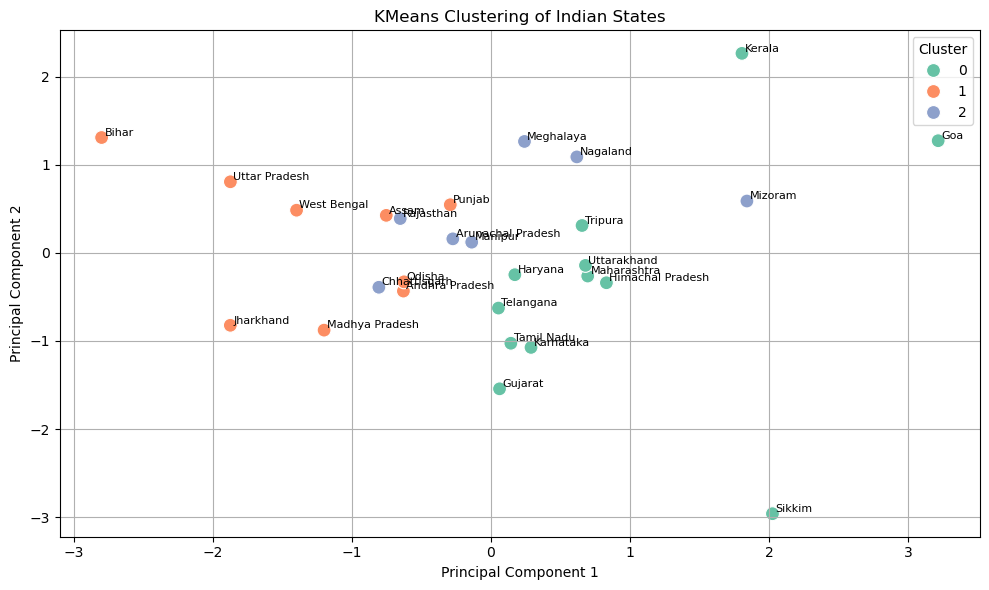

In [48]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
for i in range(df.shape[0]):
    plt.text(df['PCA1'][i]+0.02, df['PCA2'][i]+0.02, df['State'][i], fontsize=8)
plt.title("KMeans Clustering of Indian States")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
# List of states by cluster
for i in range(3):
    print(f"\nCluster {i}:")
    display(df[df['Cluster'] == i][['State'] + features])


Cluster 0:


,State,Literacy Rate,Per Capita Income,Population Density,Unemployment Rate
5,Goa,88.70,492648,394,106.0
6,Gujarat,78.03,297722,308,20.5
7,Haryana,75.55,325759,573,49.5
8,Himachal Pradesh,82.80,235199,123,50.0
10,Karnataka,75.36,332926,319,37.5
11,Kerala,94.00,281001,860,91.5
13,Maharashtra,82.34,277603,365,48.0
21,Sikkim,81.42,587743,86,18.5
22,Tamil Nadu,80.33,315220,555,26.0
23,Telangana,67.02,356564,307,56.5



Cluster 1:


,State,Literacy Rate,Per Capita Income,Population Density,Unemployment Rate
0,Andhra Pradesh,67.02,242479,308,50.0
2,Assam,72.19,135787,398,56.0
3,Bihar,61.80,68828,1106,53.0
9,Jharkhand,66.41,115960,414,23.5
12,Madhya Pradesh,69.32,142565,236,29.5
18,Odisha,72.87,163101,270,43.0
19,Punjab,75.84,196505,551,58.0
25,Uttar Pradesh,67.68,104126,829,50.0
27,West Bengal,76.26,154119,1028,35.0



Cluster 2:


,State,Literacy Rate,Per Capita Income,Population Density,Unemployment Rate
1,Arunachal Pradesh,65.38,199992,17,72.5
4,Chhattisgarh,70.28,147361,189,44.0
14,Manipur,76.94,125937,128,54.0
15,Meghalaya,74.43,136948,132,86.5
16,Mizoram,91.33,215144,52,70.5
17,Nagaland,79.55,145537,119,80.5
20,Rajasthan,66.11,167964,200,68.5


In [43]:
# 📊 Cluster-wise Averages for Interpretation
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
display(cluster_summary)

,Literacy Rate,Per Capita Income,Population Density,Unemployment Rate
Cluster,,,,
0,80.97,328359.08,369.08,51.04
1,69.93,147052.22,571.11,44.22
2,74.86,162697.57,119.57,68.07


### 🧾 Quick Cluster Summary

- **Cluster 0**: High literacy & income — developed states
- **Cluster 1**: Low literacy/income, high density — lagging states
- **Cluster 2**: Low density, high unemployment — mostly NE states

> Numeric differences justify clustering despite visual overlap in PCA.
